In [1]:
from traffic.data import sectors
from traffic.adsb import ADSB

rep = opensky.history("2017-07-13", "2017-07-14",
                      callsign=["KLM88T", "RAM650E", "RAM653D",
                                "N1972N", "AIB01KV"],
                      bounds=sectors['LFBB/FIR'])

adsb = ADSB.parse_file("../data/20170713-opensky.pkl")

100%|██████████| 25/25 [00:00<00:00, 36.45it/s]


In [11]:
rep.to_pickle("../data/20170713-opensky.pkl")

In [3]:
adsb.callsigns

{'AIB01KV', 'KLM88T', 'N1972N', 'RAM650E', 'RAM653D'}

In [4]:
adsb.aircraft

{'020025', '3803da', '484164', 'a184d7'}

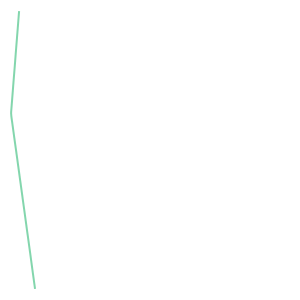

In [5]:
adsb['KLM88T']

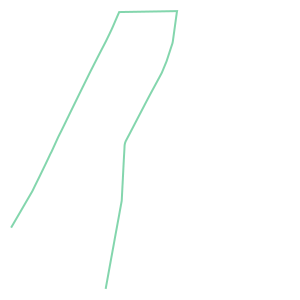

In [6]:
adsb['020025']

In [7]:
adsb.query('timestamp == "2017-07-13 10:56.09"')

,timestamp,icao24,latitude,longitude,ground_speed,track,vertical_rate,callsign,onground,alert,spi,squawk,baro_altitude,altitude,last_position,hour
112,2017-07-13 10:56:05,020025,43.631969,-1.612113,516.735463,29.442314,-64.0,RAM650E,False,False,False,1000,40050.0,41875.0,2017-07-13 10:56:00.286,1499932800


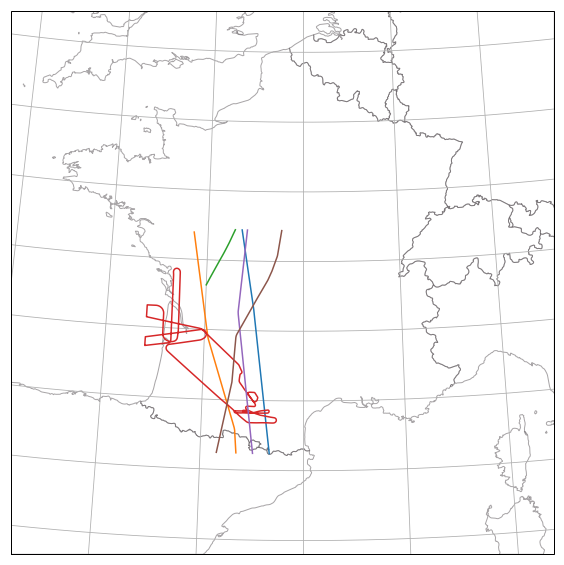

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

from cartopy.feature import NaturalEarthFeature
from cartotools.crs import PlateCarree, Lambert93

countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)

default_text = {'ha': 'center',
                'fontname': 'Ubuntu',
                'fontsize': 13,}

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=Lambert93())
ax.set_xlim(Lambert93().x_limits)
ax.set_ylim(Lambert93().y_limits)

ax.add_feature(countries)
ax.gridlines()

for callsign in adsb.callsigns:
    adsb[callsign].plot(ax)
    